In [1]:
import numpy as np 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import Adam 
import matplotlib.pyplot as plt 
%matplotlib inline 

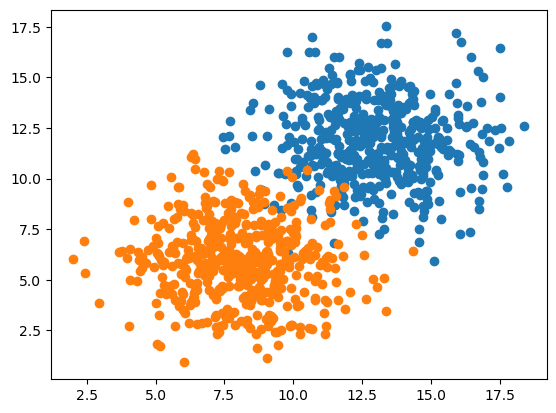

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [3]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2, ), activation = 'sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size= 50, epochs = 500, shuffle = 'true')


Epoch 1/500


c:\Users\dknjy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4816 - loss: 1.2319   
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.6323 - loss: 0.6174
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8420 - loss: 0.4626 
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8589 - loss: 0.3923
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9032 - loss: 0.3304
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9218 - loss: 0.2951 
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.9428 - loss: 0.2602
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.9639 - loss: 0.2237
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9421 - loss: 0.2256
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9596 - loss: 0.2075 
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1841 
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - ac

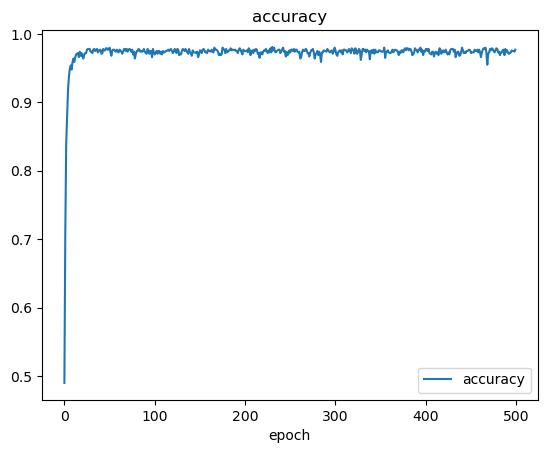

In [4]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

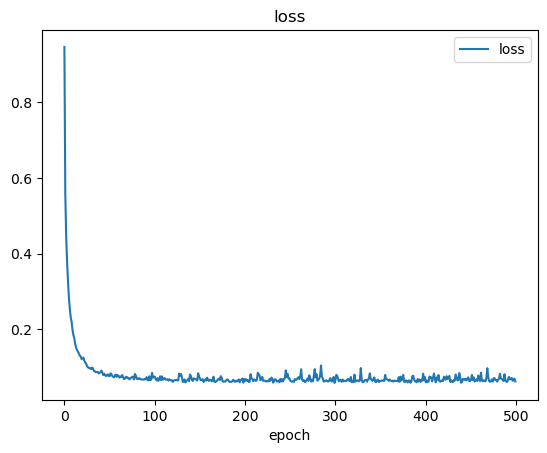

In [5]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [6]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


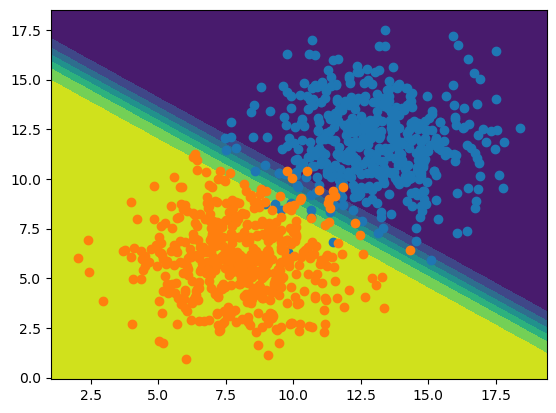

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
prediction is:  [[0.9999933]]


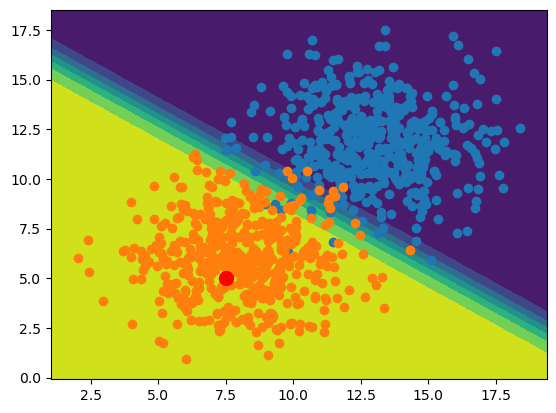

In [8]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)